<h1>Exploratory data Analysis</h1>

In [1]:
import pandas as pd
data = pd.read_csv('/content/sample_data/amazon_alexa.tsv', delimiter = '\t', quoting = 3)
data.shape

(3150, 5)

In [2]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


<h2>Checking and dropping null values, if any</h2>

In [3]:
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [4]:
data[data['verified_reviews'].isna()]

,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


In [5]:
data.dropna(inplace = True)
data.isnull().sum()
data.shape

(3149, 5)

In [6]:
data.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
dtype: object

<h2>Analysing the 'rating' column</h2>

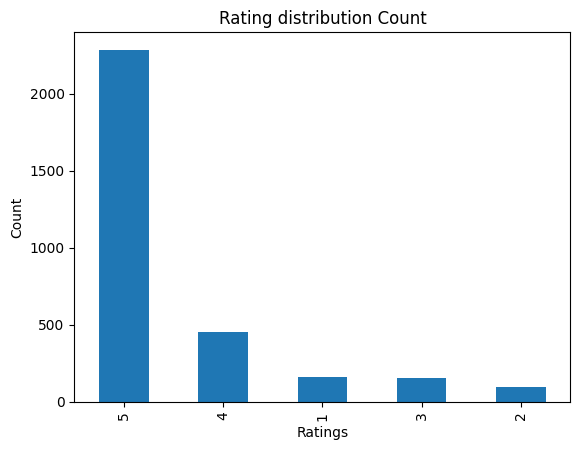

In [7]:
import matplotlib.pyplot as plt
data['rating'].value_counts()
data['rating'].value_counts().plot.bar()
plt.title('Rating distribution Count')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

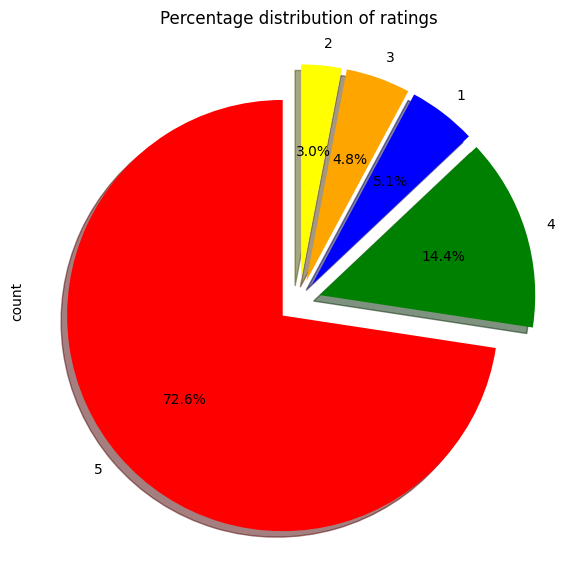

In [8]:
from io import BytesIO
fig = plt.figure(figsize = (7,7))
colors = ('red', 'green', 'blue', 'orange', 'yellow')
wp = {'linewidth' : 1, 'edgecolor' : 'black'}
sections = data['rating'].value_counts()/data.shape[0]
explode = (0.1, 0.1, 0.1, 0.1, 0.1)
sections.plot(kind = 'pie', autopct = '%1.1f%%',shadow = True, colors = colors, explode = explode, startangle = 90, title = 'Percentage distribution of ratings')
graph = BytesIO()
fig.savefig(graph, format = 'png')

<h2>Analysing 'feedback' column</h2>

In [9]:
data['feedback'].value_counts()
review_0 = data[data['feedback'] == 0].iloc[1]['verified_reviews']
review_1 = data[data['feedback'] == 1].iloc[1]['verified_reviews']
print(review_0)
print(review_1)

Sound is terrible if u want good music too get a bose
Loved it!


<h6>This concludes that the value 0 in feedback column corresponds to
a negative review while the value 1 corresponsds to a positive review</h6>

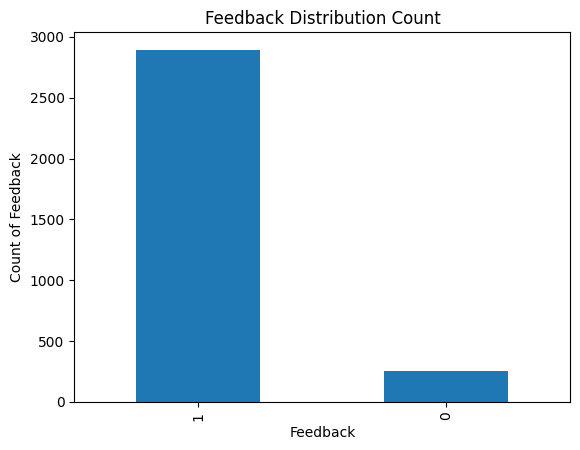

In [10]:
# plotting the feedback column
data['feedback'].value_counts().plot.bar()
plt.title('Feedback Distribution Count')
plt.xlabel('Feedback')
plt.ylabel('Count of Feedback')
plt.show()

In [11]:
print('Feedback Value count - Percentage Distribution')
percentage_values = round(data['feedback'].value_counts()/data.shape[0] * 100, 2)
print(percentage_values)

Feedback Value count - Percentage Distribution
feedback
1    91.87
0     8.13
Name: count, dtype: float64


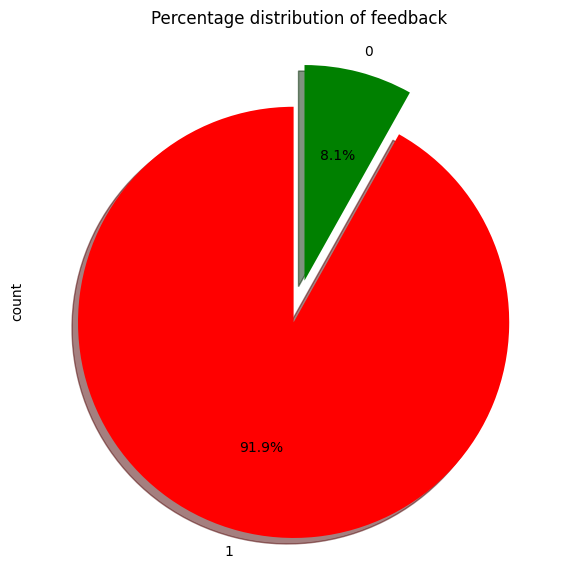

In [12]:
from io import BytesIO
fig = plt.figure(figsize = (7,7))
colors = ('red', 'green')
wp = {'linewidth' : 1, 'edgecolor' : 'black'}
sections = data['feedback'].value_counts()/data.shape[0]
explode = (0.1, 0.1)
sections.plot(kind = 'pie', autopct = '%1.1f%%',shadow = True, colors = colors, explode = explode, startangle = 90, title = 'Percentage distribution of feedback')
graph = BytesIO()
fig.savefig(graph, format = 'png')

In [13]:
feedback_0 = data[data['feedback'] == 0]['rating'].value_counts()
feedback_1 = data[data['feedback'] == 1]['rating'].value_counts()
print(feedback_0)
print(feedback_1)

rating
1    161
2     95
Name: count, dtype: int64
rating
5    2286
4     455
3     152
Name: count, dtype: int64


<h6><b>Ratings 1,2 correspond to a NEGATIVE feedback while ratings 3, 4, 5 to a POSITIVE feedback</b></h6>

<h2>Analysing the 'variation' column</h2>

In [14]:
data['variation'].value_counts()

variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
Sandstone Fabric                 90
White                            90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64

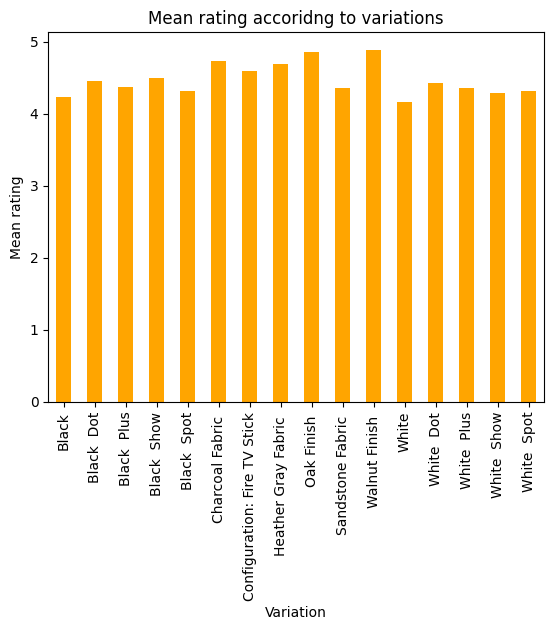

In [15]:
data.groupby('variation')['rating'].mean().plot.bar(color = 'orange')
plt.title('Mean rating accoridng to variations')
plt.xlabel('Variation')
plt.ylabel('Mean rating')
plt.show()

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
cv = CountVectorizer(stop_words = 'english')
words = cv. fit_transform(data.verified_reviews)

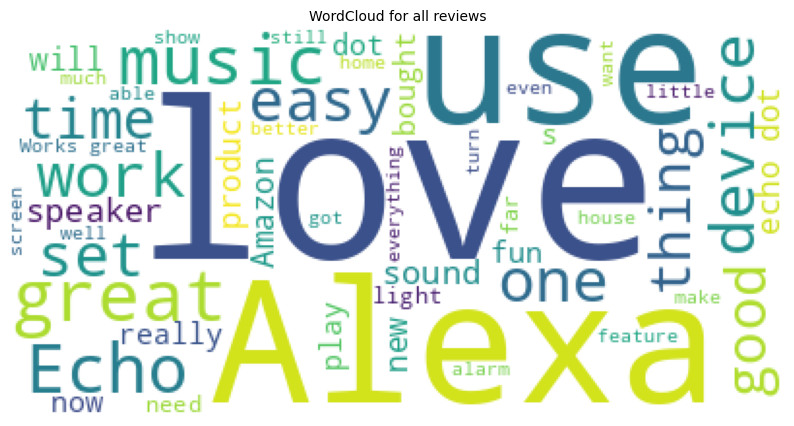

In [17]:
reviews = " ".join([review for review in data['verified_reviews']])
wc = WordCloud(background_color = 'white', max_words = 50)
plt.figure(figsize = (10, 10))
plt.imshow(wc.generate(reviews))
plt.title('WordCloud for all reviews', fontsize = 10)
plt.axis('off')
plt.show()

In [18]:
negative_reviews = " ".join([review for review in data[data['feedback'] == 0]['verified_reviews']])
negative_reviews = negative_reviews.lower().split()

positive_reviews = " ".join([review for review in data[data['feedback'] == 1]['verified_reviews']])
positive_reviews = positive_reviews.lower().split()

unique_negative_reviews = [negative_review for negative_review in negative_reviews if negative_review not in positive_reviews]
unique_negative_reviews = " ".join(unique_negative_reviews)

unique_positive_reviews = [positive_review for positive_review in positive_reviews if positive_review not in negative_reviews]
unique_positive_reviews = " ".join(unique_positive_reviews)
unique_positive_reviews

'echo! "sometimes game, home." yr learns dinosaurs, games categories. well." gift. accessible, do." "without cellphone, ipad alarm. r deaf, bedroom her.it random response. smartbon politics 5th purchased. room house. specifily controlling house. "love listened songs childhood! news, weather, information! great!" 85 dad, talks constantly." learning eveyday! figuring understand. laugh mother knee did.she enjoys do...alexa song, where, cook that!" "love, love, love!!" expected.... hates purchase. toy. household member! learn featues benefits 2nd improvement shorter greater fabric/color choices. ring top, plus/minus buttons. ring w comforting. :) standard usb charger /port round pin. alexa/echo/computer. like? :)" understands commands specific playlists songs spotify. lacking major programs. "we alexa! itunes, podcasts anypod, flash briefing morning. rely custom lists. volume. we\'re we\'ll uses.sometimes we\'re saying." "have days. size, stationed counter intrusive at." plays bedroom, imp

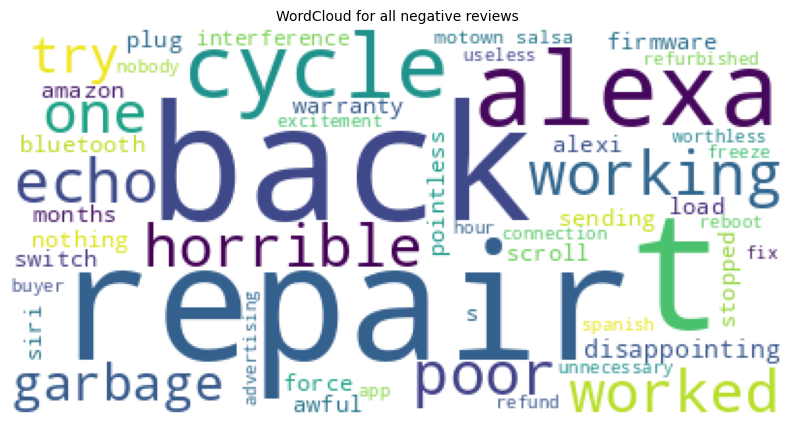

In [19]:
wc = WordCloud(background_color = 'white', max_words = 50)

# plotting negative reviews
plt.figure(figsize = (10, 10))
plt.imshow(wc.generate(unique_negative_reviews))
plt.title('WordCloud for all negative reviews', fontsize = 10)
plt.axis('off')
plt.show()

In [20]:
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [21]:
import re
corpus = []
stemmer = PorterStemmer()
for i in range(0, data.shape[0]):
  review = re.sub('[^a-zA-Z]', ' ', data.iloc[i]['verified_reviews'])
  review = review.lower().split()
  review = [stemmer.stem(word) for word in review if word not in STOPWORDS]
  review = ' '.join(review)
  corpus.append(review)

<h2>Using Count Vectorizer to create bag of words</h2>

In [22]:
cv = CountVectorizer(max_features = 2500)

# storing dependent and independent variables in x and y
X = cv.fit_transform(corpus).toarray()
Y = data['feedback'].values

In [26]:
# saving the count vectorizer
import pickle

pickle.dump(cv, open('/content/sample_data/Models/countvectorizer.pkl', 'wb'))

In [27]:
# checking shape of x and y
print(f"X shape : {X.shape}")
print(f"Y shape : {Y.shape}")

X shape : (3149, 2500)
Y shape : (3149,)


<h2>Splitting the test train data in the ratio 3:7</h2>

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 15)
print(f"X train : {X_train.shape}")
print(f"Y train : {Y_train.shape}")
print(f"X test : {X_test.shape}")
print(f"Y test : {Y_test.shape}")

X train : (2204, 2500)
Y train : (2204,)
X test : (945, 2500)
Y test : (945,)


In [29]:
print(f"X train max value {X_train.max()}")
print(f"X test max value {X_test.max()}")

X train max value 12
X test max value 10


<h3>We will scale X train and X test so that all values are between 0 and 1</h3>

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled[:2])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [31]:
# saving the scaler model
pickle.dump(scaler, open('/content/sample_data/Models/scaler.pkl', 'wb'))

<h2>Random Forest</h2>

In [32]:
# Fitting scaled X train and Y train on Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train_scaled, Y_train)

RandomForestClassifier()

In [33]:
# Accuracy of the model on training and testing data

print("Training Accuracy : ", model_rf.score(X_train, Y_train))
print("Testing Accuracy : ", model_rf.score(X_test_scaled, Y_test))

Training Accuracy :  0.9941016333938294
Testing Accuracy :  0.944973544973545


In [34]:
# Predicting on test set
Y_predicted = model_rf.predict(X_test_scaled)

<h2>Plotting Confusion Matrix</h2>

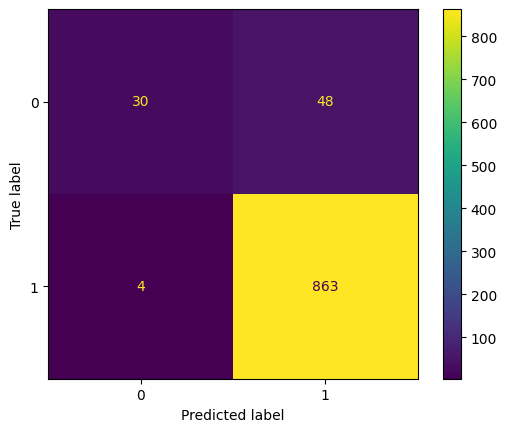

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix_of_data = confusion_matrix(Y_test, Y_predicted)
confusion_matrix_display_of_data = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_of_data, display_labels = model_rf.classes_)
confusion_matrix_display_of_data.plot()
plt.show()

In [36]:
# saving the model in pickle file
pickle.dump(model_rf, open('/content/sample_data/Models/model_rf.pkl', 'wb'))

<h2>K fold Cross Validation</h2>

In [37]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = model_rf, X = X_train_scaled, y = Y_train, cv = 10)

print("Accuracy : ", accuracies.mean())
print("Standard Variance : ", accuracies.std())

Accuracy :  0.9305841217605924
Standard Variance :  0.007300328405750293


<h3>Applying grid search to get optimal paramters on random forest</h3>

In [38]:
params = {
    'bootstrap': [True],
    'max_depth': [80, 100],
    'min_samples_split': [8, 12],
    'n_estimators': [100, 300]
}

In [39]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

cv_object = StratifiedKFold(n_splits = 2)
grid_search = GridSearchCV(estimator = model_rf, param_grid = params, cv = cv_object, verbose = 0, return_train_score = True)
grid_search.fit(X_train_scaled, Y_train.ravel())

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 100],
                         'min_samples_split': [8, 12],
                         'n_estimators': [100, 300]},
             return_train_score=True)

<h3>Getting the best parameters from grid search</h3>

In [40]:
print(f"Best parameters Combination : {grid_search.best_params_}")

Best parameters Combination : {'bootstrap': True, 'max_depth': 100, 'min_samples_split': 12, 'n_estimators': 100}


In [41]:
from sklearn.metrics import accuracy_score

print(f"Cross Validation mean accuracy score on training set : {grid_search.cv_results_['mean_train_score'].mean() * 100}")
print(f"Cross Validation mean accuracy score on testing set : {grid_search.cv_results_['mean_test_score'].mean() * 100}")

print(f"Accuracy score for test set : {accuracy_score(Y_test, Y_predicted)}")

Cross Validation mean accuracy score on training set : 96.73888384754991
Cross Validation mean accuracy score on testing set : 92.2073502722323
Accuracy score for test set : 0.944973544973545


<h2>Decision Tree Classifier</h2>

In [42]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train_scaled, Y_train)

DecisionTreeClassifier()

In [43]:
# accuracy of the model on training and testing data

print(f"Training Accuracy : {model_dt.score(X_train_scaled, Y_train)}")
print(f"Testing Accuracy : {model_dt.score(X_test_scaled, Y_test)}")

Training Accuracy : 0.9945553539019963
Testing Accuracy : 0.9153439153439153


In [44]:
Y_predicted = model_dt.predict(X_test)

[[ 41  37]
 [ 67 800]]


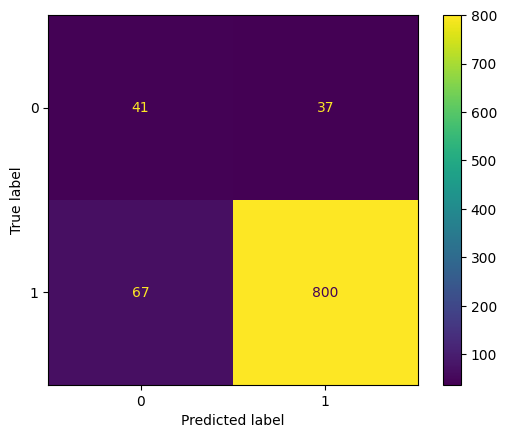

In [45]:
confusion_matrix_of_data = confusion_matrix(Y_test, Y_predicted)
print(confusion_matrix_of_data)
confusion_matrix_display_of_data = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_of_data, display_labels = model_rf.classes_)
confusion_matrix_display_of_data.plot()
plt.show()

In [46]:
# saving the model in pickle file
pickle.dump(model_rf, open('/content/sample_data/Models/model_dt.pkl', 'wb'))

In [2]:
import pickle
predictor = pickle.load(open(r"/content/sample_data/Models/model_rf.pkl", 'rb'))
scaler = pickle.load(open(r"/content/sample_data/Models/scaler.pkl", 'rb'))
cv = pickle.load(open(r"/content/sample_data/Models/countvectorizer.pkl", 'rb'))

In [14]:
import re
import nltk
import pandas as pd
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
from sklearn.feature_extraction.text import CountVectorizer

print("stopwords ",STOPWORDS)
text_input = "hello my name is james"
corpus = []
cvt = CountVectorizer()
stemmer = PorterStemmer()
review = re.findall("[a-zA-Z]+",text_input)
review = [individual_review.lower() for individual_review in review]
print("review list ", review)
review = [stemmer.stem(word) for word in review if word not in STOPWORDS]
review = " ".join(review)
print("review string",review)
corpus.append(review)
X_prediction = cvt.fit_transform(corpus).toarray()
print("X pred ",X_prediction)
df = pd.DataFrame(data=X_prediction)
print(df)
#
#
#Y_predictions = Y_predictions.argmax(axis = 1)[0]

stopwords  {'is', 'at', 'very', "wouldn't", 'ain', 'was', 'do', 'as', 'ours', 'this', 'won', 'don', 'you', 'any', 'ourselves', 'during', 'd', 'some', 'each', 'shouldn', 'my', 've', 'same', "won't", 'no', 'under', 'just', 'below', 'all', 'should', "you'll", 'himself', 'mustn', 'yourself', 'after', 'were', 'only', 'once', "should've", 'own', 're', 'its', "doesn't", 'we', 'haven', 'these', "couldn't", 'than', 'against', 'then', 'myself', 'weren', 'about', "don't", 'their', 'those', 'had', 'up', 'did', 'itself', 'isn', "mightn't", 'hasn', "haven't", 'y', 'to', 'too', 'o', 'over', 'herself', 'or', 'because', 'he', 'whom', 'them', 'his', "shouldn't", 'couldn', 'before', 'hers', 'of', 'here', 'for', 'it', 'and', 'they', 'aren', "that'll", 'been', 'between', 'how', 'most', "mustn't", 'wouldn', 'are', 'what', "needn't", 'will', "wasn't", 'm', 'the', 'not', 'so', 'into', 'again', 'wasn', 'above', 'where', 'which', 'more', "you're", 'your', 'am', 'out', 'me', 'further', 'hadn', "hadn't", 'down', 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
if 'not' in STOPWORDS:
  print("yes")
else:
  print("no")

yes


In [16]:
print(Y_predictions)

1
